In [1]:
import os
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re #导入python正则表达式包

from pandas import Series,DataFrame
from matplotlib.font_manager import FontProperties  #用于为matplotlib设置中文字

#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sb.set(font = mfont.get_name())

分析数据中的无效数据

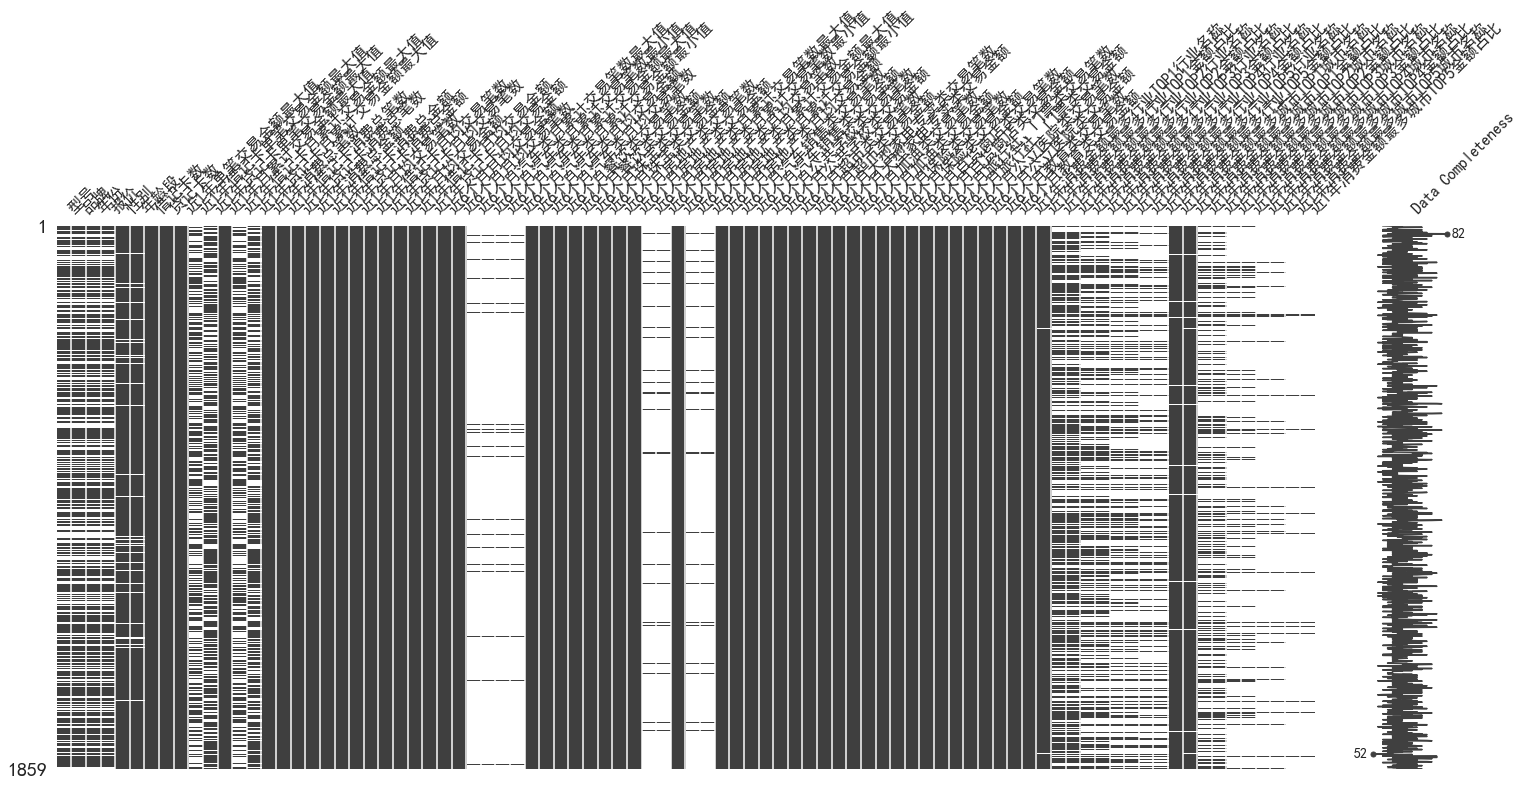

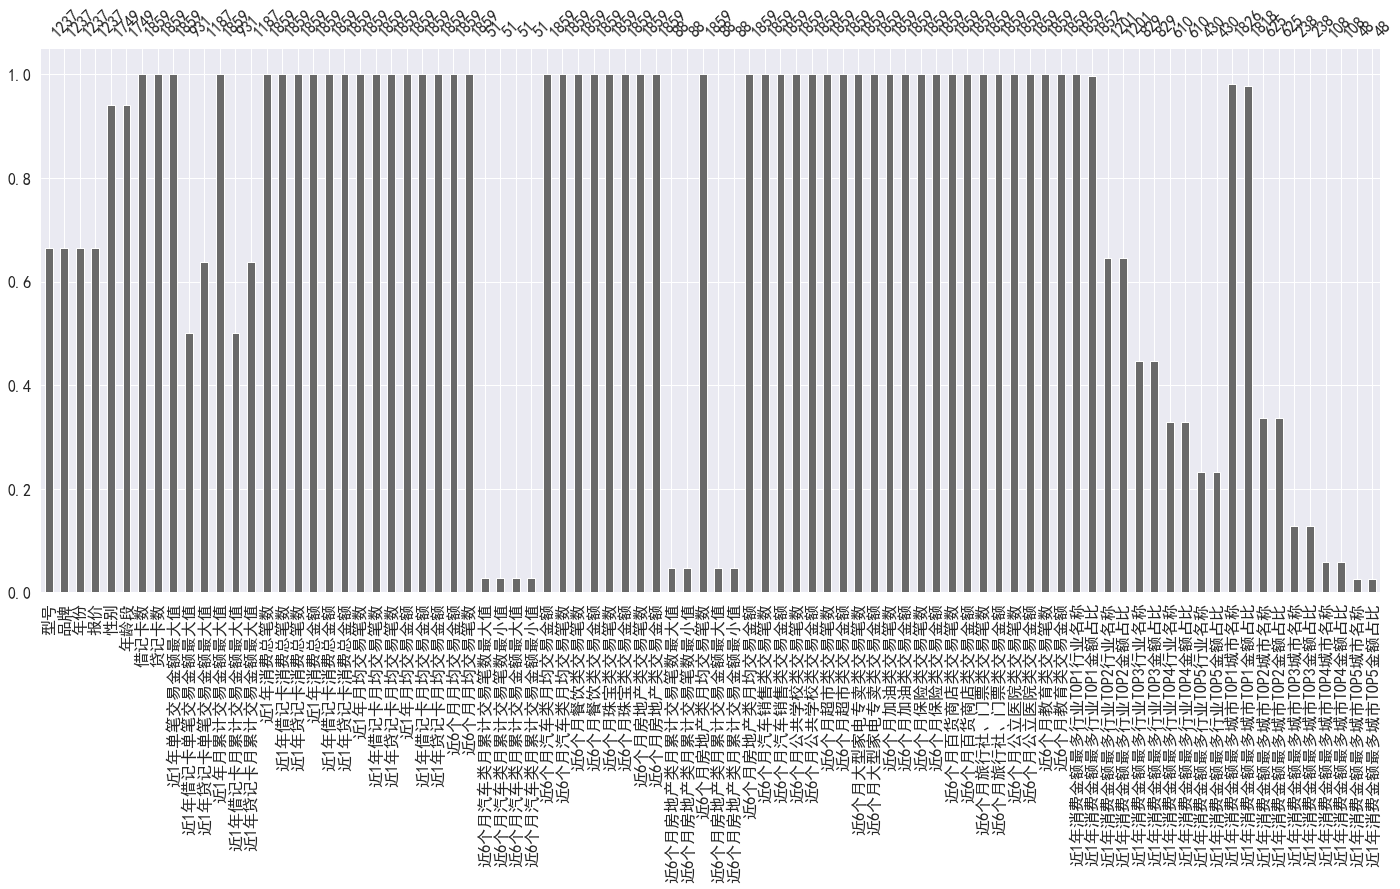

In [2]:
expances_data = pd.read_excel('expances.xlsx', 'sheet1', index_col='userid', na_values=['#N/A'])
#可视化查看缺损值
msno.matrix(expances_data, labels=True)
plot = msno.bar(expances_data)
#msno.dendrogram(expances_data)

计算车辆中间报价

In [4]:
#使用pandas自带的方法读取excel文件
car_data = pd.read_excel('car_info.xlsx', 'vehicleInfo', index_col='CarID' , na_values=['#N/A'])
#抽取车报价并汽车计算平均报价
car_data.loc[:,'报价']
#利用python正则表达式提取数字数据
low_price = car_data['报价'].apply(lambda x: min(re.findall(r'\d+\.?\d*', x)))
high_price = car_data['报价'].apply(lambda x: max(re.findall(r'\d+\.?\d*', x)))
#插回表格,此时需要数据类型转换已便进一步计算
car_data.insert(4, '最低报价', pd.to_numeric(low_price))
car_data.insert(5, '最高报价', pd.to_numeric(high_price))
middle_price = car_data.iloc[:,4:6].mean(1)
#插入回数据集
car_data.insert(6,'中间报价', pd.to_numeric(middle_price))
car_data

,品牌,型号,年份,报价,最低报价,最高报价,中间报价
CarID,,,,,,,
1,现代,悦动,2008.0,[ 10.0 - 13.0 ] 万,10.0,13.0,11.50
2,别克,君越,2009.0,[ 22.0 - 32.0 ] 万,22.0,32.0,27.00
3,别克,君越,2013.0,[ 23.6 - 37.0 ] 万,23.6,37.0,30.30
4,现代,伊兰特,2004.0,[ 11.3 - 15.2 ] 万,11.3,15.2,13.25
5,广汽,传祺GS5,2012.0,[ 12.4 - 23.0 ] 万,12.4,23.0,17.70
6,福特,锐界,2011.0,[ 29.3 - 43.0 ] 万,29.3,43.0,36.15
7,沃尔沃,S80,2006.0,[ 40.0 - 89.5 ] 万,40.0,89.5,64.75
8,现代,索纳塔,2004.0,[ 15.0 - 22.8 ] 万,15.0,22.8,18.90
9,奥迪,A6L,2009.0,[ 34.8 - 69.6 ] 万,34.8,69.6,52.20
